## ***`UMAP`***
### ***`Uniform Manifold Approximation and Projection for Dimension Reduction`***

![img1](../MODULE-2/UMAP_Images/Img1.png)

![img2](../MODULE-2/UMAP_Images/Img2.png)

![img3](../MODULE-2/UMAP_Images/Img3.png)

![img4](../MODULE-2/UMAP_Images/Img4.png)

![img5](../MODULE-2/UMAP_Images/Img5.png)

![img6](../MODULE-2/UMAP_Images/Img6.png)

![img7](../MODULE-2/UMAP_Images/Img7.png)

In [1]:
import umap

In [2]:
dir(umap)

['UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'distances',
 'layouts',
 'nndescent',
 'numba',
 'pkg_resources',
 'rp_tree',
 'sparse',
 'sparse_nndescent',
 'spectral',
 'umap_',
 'utils']

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.datasets import load_breast_cancer as bc, load_iris as l_iris
from sklearn.preprocessing import StandardScaler as SS
from sklearn.manifold import TSNE

%matplotlib inline

In [4]:
cancer = bc()                                  ## Instantiating Breast Cancer Dataset object
iris = l_iris()                                ## Instantiating IRIS Datset object
ss = SS()                                      ## Instantiating Standard Scaler
tsne = TSNE(n_components=2, random_state=41)   ## Instantiating TSNE

In [6]:
cancer_df = pd.concat([pd.DataFrame(cancer.data,columns=cancer.feature_names),pd.DataFrame(cancer.target,columns=['target'])],axis=1)
cancer_norm_df = pd.DataFrame(ss.fit_transform(cancer_df.iloc[:,0:-1]),columns=cancer.feature_names)
cancer_norm_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [47]:
umap_cancer = umap.UMAP(n_neighbors=15,
                        n_components=2,
#                         metric=scipy.spatial.minkowski_distance,
#                         output_metric=scipy.spatial.minkowski_distance,
                        n_epochs=500,
                       learning_rate=0.1)

In [48]:
umap_cancer_cmps = pd.DataFrame(umap_cancer.fit_transform(cancer_norm_df),columns=['PC1','PC2'])
umap_cancer_cmps.head()

,PC1,PC2
0,3.380215,5.025793
1,4.375889,6.677148
2,3.587639,5.466293
3,5.169765,4.144957
4,3.752145,7.049897


In [44]:
umap_cancer_cmps.shape

(569, 2)

In [49]:
umap_cancer_cmps = pd.concat([umap_cancer_cmps,cancer_df['target']],axis=1)
umap_cancer_cmps.head()

,PC1,PC2,target
0,3.380215,5.025793,0
1,4.375889,6.677148,0
2,3.587639,5.466293,0
3,5.169765,4.144957,0
4,3.752145,7.049897,0


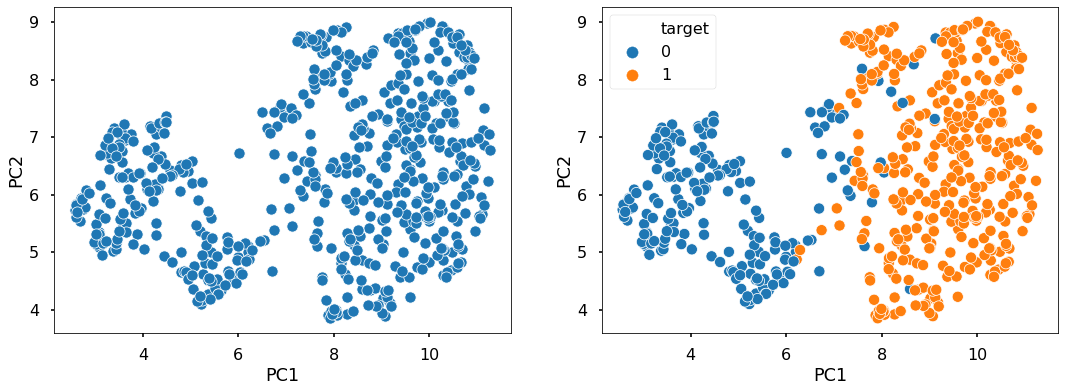

In [50]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC2',ax=ax[0])
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC2',hue='target',ax=ax[1])

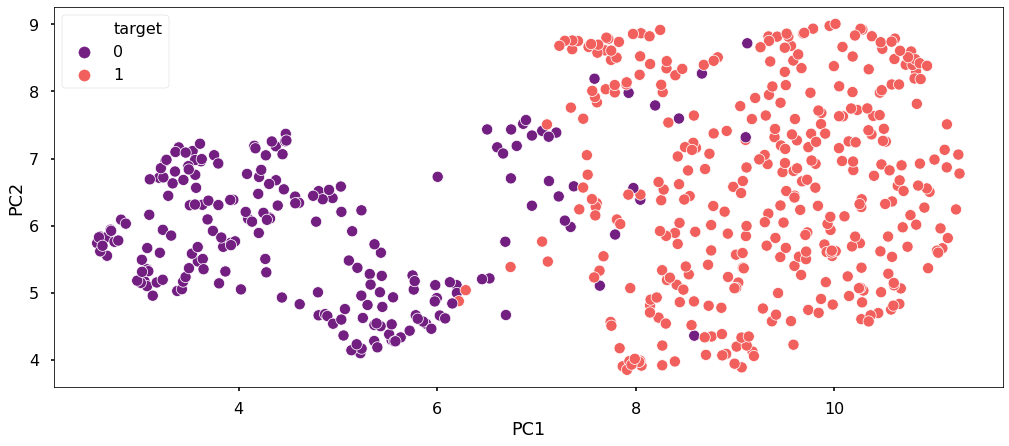

In [61]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(17,7))
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC2',hue='target',ax=ax,palette='magma')